<a href="https://colab.research.google.com/github/ogu83/MachineLearningPythonExercise/blob/master/MachineLearningExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wisconsin Breast Cancer Test


In [2]:

import numpy as np
from sklearn import preprocessing, model_selection, neighbors, svm
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

from google.colab import drive    
drive.mount('/content/gdrive')

def predict_example(clf,example_measures):    
    example_measures = example_measures.reshape(len(example_measures),-1)
    prediction = clf.predict(example_measures)
    print(example_measures,prediction)

df = pd.read_csv('/content/gdrive/My Drive/MachineLearningSamples/breast-cancer-wisconsin.data.txt')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True) 

X=np.array(df.drop(['class'],1))
y=np.array(df['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

#clf = neighbors.KNeighborsClassifier(n_jobs=-1)
clf = svm.SVC()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)

print("accuracy: ", accuracy)
predict_example(clf,np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,2,2,2,3,2,1],[4,2,1,5,1,2,5,2,1],[1,1,1,1,1,1,1,1,1],[9,9,9,9,9,9,9,9,9]]))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
accuracy:  0.9642857142857143
[[4 2 1 1 1 2 3 2 1]
 [4 2 1 2 2 2 3 2 1]
 [4 2 1 5 1 2 5 2 1]
 [1 1 1 1 1 1 1 1 1]
 [9 9 9 9 9 9 9 9 9]] [2 2 4 2 4]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
import numpy as np
from sklearn import preprocessing, model_selection, neighbors
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

from google.colab import drive    
drive.mount('/content/gdrive')

def predict_example(clf,example_measures):    
    example_measures = example_measures.reshape(len(example_measures),-1)
    prediction = clf.predict(example_measures)
    print(example_measures,prediction)

accuracies = []

for i in range(25):
    df = pd.read_csv('/content/gdrive/My Drive/MachineLearningSamples/breast-cancer-wisconsin.data.txt')
    df.replace('?', -99999, inplace=True)
    df.drop(['id'], 1, inplace=True) 

    X=np.array(df.drop(['class'],1))
    y=np.array(df['class'])

    X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2)

    clf = neighbors.KNeighborsClassifier(n_jobs=-1)
    clf.fit(X_train, y_train)

    accuracy = clf.score(X_test, y_test)

    #plt.scatter(reduce(lambda x,y:x+y,X_train),y_train)
    # for i in X[0]:
    #     for ii in y:
    #         plt.scatter(X[ii][i],y[ii])
    # plt.show()
    
    print("accuracy: ", accuracy)    
    predict_example(clf,np.array([[4,2,1,5,1,2,5,2,1],[1,1,1,1,1,1,1,1,1],[9,9,9,9,9,9,9,9,9]]))
    accuracies.append(accuracy)

print(sum(accuracies)/len(accuracies))

# Mean Shift Blobs

[[ 1.25208462  0.66939429  1.03866678]
 [ 5.11526267  4.78526747  5.05981397]
 [ 2.98972007 10.55673673  9.94961945]]
Number of Estimated Clusters: 3


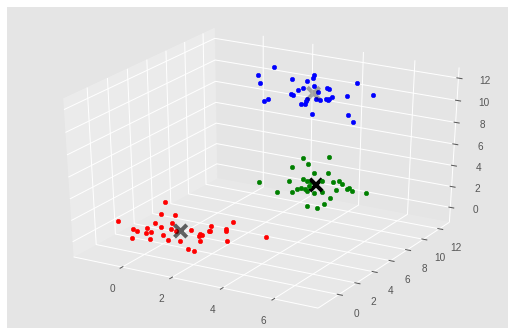

In [4]:
from sklearn.datasets.samples_generator import make_blobs
import sklearn.cluster as clstr
#import MeanShiftBlobs
import matplotlib.pyplot as plt
import matplotlib.figure
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
import numpy as np
style.use('ggplot')

centers = [[1,1,1],[5,5,5],[3,10,10]]
X, _ = make_blobs(n_samples=100, centers=centers, cluster_std=1)

ms = clstr.MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of Estimated Clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], 
            marker='x', color='k', s=150, linewidths=5, zorder = 10)

plt.show()

# Sentiment Big Data

## Sentiment PreProcessing


In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pickle
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

'''
polarity 0 = negative. 2 = neutral. 4 = positive.
id
date
query
user
tweet
'''

def init_process(fin,fout):
	outfile = open(fout,'a')
	with open(fin, buffering=200000, encoding='latin-1') as f:
		try:
			for line in f:
				line = line.replace('"','')
				initial_polarity = line.split(',')[0]
				if initial_polarity == '0':
					initial_polarity = [1,0]
				elif initial_polarity == '4':
					initial_polarity = [0,1]

				tweet = line.split(',')[-1]
				outline = str(initial_polarity)+':::'+tweet
				outfile.write(outline)
		except Exception as e:
			print(str(e))
	outfile.close()

init_process('/content/gdrive/My Drive/MachineLearningSamples/training.1600000.processed.noemoticon.csv','/content/gdrive/My Drive/MachineLearningSamples/train_set.csv')
init_process('/content/gdrive/My Drive/MachineLearningSamples/testdata.manual.2009.06.14.csv','/content/gdrive/My Drive/MachineLearningSamples/test_set.csv')


def create_lexicon(fin):
	lexicon = []
	with open(fin, 'r', buffering=100000, encoding='latin-1') as f:
		try:
			counter = 1
			content = ''
			for line in f:
				counter += 1
				if (counter/2500.0).is_integer():
					tweet = line.split(':::')[1]
					content += ' '+tweet
					words = word_tokenize(content)
					words = [lemmatizer.lemmatize(i) for i in words]
					lexicon = list(set(lexicon + words))
					print(counter, len(lexicon))

		except Exception as e:
			print(str(e))

	with open('/content/gdrive/My Drive/MachineLearningSamples/lexicon-2500-2638.pickle','wb') as f:
		pickle.dump(lexicon,f)

create_lexicon('/content/gdrive/My Drive/MachineLearningSamples/train_set.csv')


def convert_to_vec(fin,fout,lexicon_pickle):
	with open(lexicon_pickle,'rb') as f:
		lexicon = pickle.load(f)
	outfile = open(fout,'a')
	with open(fin, buffering=20000, encoding='latin-1') as f:
		counter = 0
		for line in f:
			counter +=1
			label = line.split(':::')[0]
			tweet = line.split(':::')[1]
			current_words = word_tokenize(tweet.lower())
			current_words = [lemmatizer.lemmatize(i) for i in current_words]

			features = np.zeros(len(lexicon))

			for word in current_words:
				if word.lower() in lexicon:
					index_value = lexicon.index(word.lower())
					# OR DO +=1, test both
					features[index_value] += 1

			features = list(features)
			outline = str(features)+'::'+str(label)+'\n'
			outfile.write(outline)

		print(counter)

convert_to_vec('/content/gdrive/My Drive/MachineLearningSamples/test_set.csv','/content/gdrive/My Drive/MachineLearningSamples/processed-test-set.csv','/content/gdrive/My Drive/MachineLearningSamples/lexicon-2500-2638.pickle')


def shuffle_data(fin):
	df = pd.read_csv(fin, error_bad_lines=False)
	df = df.iloc[np.random.permutation(len(df))]
	print(df.head())
	df.to_csv('/content/gdrive/My Drive/MachineLearningSamples/train_set_shuffled.csv', index=False)
	
shuffle_data('/content/gdrive/My Drive/MachineLearningSamples/train_set.csv')


def create_test_data_pickle(fin):

	feature_sets = []
	labels = []
	counter = 0
	with open(fin, buffering=20000) as f:
		for line in f:
			try:
				features = list(eval(line.split('::')[0]))
				label = list(eval(line.split('::')[1]))

				feature_sets.append(features)
				labels.append(label)
				counter += 1
			except:
				pass
	print(counter)
	feature_sets = np.array(feature_sets)
	labels = np.array(labels)

create_test_data_pickle('/content/gdrive/My Drive/MachineLearningSamples/processed-test-set.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
2500 26
5000 32
7500 41
10000 63
12500 85
15000 89
17500 91
20000 108
22500 113
25000 120
27500 128
30000 141
32500 159
35000 173
37500 177
40000 185
42500 198
45000 212
47500 224
50000 240
52500 252
55000 265
57500 266
60000 268
62500 279
65000 283
67500 290
70000 298
72500 305
75000 320
77500 328
80000 335
82500 344
85000 355
87500 357
90000 360
92500 373
95000 387
97500 398
100000 401
102500 411
105000 417
107500 424
110000 428
112500 437
115000 447
117500 449
120000 452
122500 459
125000 464
127500 465
130000 467
132500 469
135000 479
137500 489
140000 495
142500 499
145000 506
147500 513
150000 527
152500 531
155000 535
157500 539
160000 

# Sentiment Neural Network

In [0]:
import tensorflow as tf
import pickle
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from google.colab import drive
drive.mount('/content/gdrive')

lemmatizer = WordNetLemmatizer()

n_nodes_hl1 = 500
n_nodes_hl2 = 500

n_classes = 2

batch_size = 32
total_batches = int(1600000/batch_size)
hm_epochs = 10

x = tf.placeholder('float')
y = tf.placeholder('float')

hidden_1_layer = {'f_fum':n_nodes_hl1,
                  'weight':tf.Variable(tf.random_normal([2638, n_nodes_hl1])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl1]))}

hidden_2_layer = {'f_fum':n_nodes_hl2,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl2]))}

output_layer = {'f_fum':None,
                'weight':tf.Variable(tf.random_normal([n_nodes_hl2, n_classes])),
                'bias':tf.Variable(tf.random_normal([n_classes])),}

def neural_network_model(data):
    l1 = tf.add(tf.matmul(data,hidden_1_layer['weight']), hidden_1_layer['bias'])
    l1 = tf.nn.relu(l1)
    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weight']), hidden_2_layer['bias'])
    l2 = tf.nn.relu(l2)
    output = tf.matmul(l2,output_layer['weight']) + output_layer['bias']
    return output

saver = tf.train.Saver()
tf_log = 'tf.log'

def train_neural_network(x):
    prediction = neural_network_model(x)
    # cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(features=prediction,labels=y) )
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction,labels=y))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
    with tf.Session() as sess:
        # sess.run(tf.initialize_all_variables())
        sess.run(tf.global_variables_initializer())
        try:
            epoch = int(open(tf_log,'r').read().split('\n')[-2])+1
            print('STARTING:',epoch)
        except:
            epoch = 1

        while epoch <= hm_epochs:
            if epoch != 1:
                saver.restore(sess,"/content/gdrive/My Drive/MachineLearningSamples/model.ckpt")
            epoch_loss = 1
            # with open('/content/gdrive/My Drive/MachineLearningSamples/lexicon.pickle','rb') as f:
            with open('/content/gdrive/My Drive/MachineLearningSamples/lexicon-2500-2638.pickle','rb') as f:                
                lexicon = pickle.load(f)
            with open('/content/gdrive/My Drive/MachineLearningSamples/train_set_shuffled.csv', buffering=20000, encoding='latin-1') as f:
                batch_x = []
                batch_y = []
                batches_run = 0
                for line in f:
                    label = line.split(':::')[0]
                    tweet = line.split(':::')[1]
                    current_words = word_tokenize(tweet.lower())
                    current_words = [lemmatizer.lemmatize(i) for i in current_words]

                    features = np.zeros(len(lexicon))

                    for word in current_words:
                        if word.lower() in lexicon:
                            index_value = lexicon.index(word.lower())
                            # OR DO +=1, test both
                            features[index_value] += 1
                    line_x = list(features)
                    line_y = eval(label)
                    batch_x.append(line_x)
                    batch_y.append(line_y)
                    if len(batch_x) >= batch_size:
                        _, c = sess.run([optimizer, cost], feed_dict={x: np.array(batch_x),
                                                                  y: np.array(batch_y)})
                        epoch_loss += c
                        batch_x = []
                        batch_y = []
                        batches_run +=1
                        print('Batch run:',batches_run,'/',total_batches,'| Epoch:',epoch,'| Batch Loss:',c,)

            saver.save(sess, "/content/gdrive/My Drive/MachineLearningSamples/model.ckpt")
            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)
            with open(tf_log,'a') as f:
                f.write(str(epoch)+'\n') 
            epoch +=1

train_neural_network(x)

def test_neural_network():
    prediction = neural_network_model(x)
    with tf.Session() as sess:
        # sess.run(tf.initialize_all_variables())
        sess.run(tf.global_variables_initializer())
        for epoch in range(hm_epochs):
            try:
                saver.restore(sess,"./model.ckpt")
            except Exception as e:
                print(str(e))
            epoch_loss = 0
            
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        feature_sets = []
        labels = []
        counter = 0
        with open('processed-test-set.csv', buffering=20000) as f:
            for line in f:
                try:
                    features = list(eval(line.split('::')[0]))
                    label = list(eval(line.split('::')[1]))
                    feature_sets.append(features)
                    labels.append(label)
                    counter += 1
                except:
                    pass
        print('Tested',counter,'samples.')
        test_x = np.array(feature_sets)
        test_y = np.array(labels)
        print('Accuracy:',accuracy.eval({x:test_x, y:test_y}))

test_neural_network()

def use_neural_network(input_data):
    prediction = neural_network_model(x)
    with open('/content/gdrive/My Drive/MachineLearningSamples/lexicon-2500-2638.pickle','rb') as f:
        lexicon = pickle.load(f)
        
    with tf.Session() as sess:
        # sess.run(tf.initialize_all_variables())
        sess.run(tf.global_variables_initializer())
        saver.restore(sess,"/content/gdrive/My Drive/MachineLearningSamples/model.ckpt")
        current_words = word_tokenize(input_data.lower())
        current_words = [lemmatizer.lemmatize(i) for i in current_words]
        features = np.zeros(len(lexicon))

        for word in current_words:
            if word.lower() in lexicon:
                index_value = lexicon.index(word.lower())
                # OR DO +=1, test both
                features[index_value] += 1

        features = np.array(list(features))
        # pos: [1,0] , argmax: 0
        # neg: [0,1] , argmax: 1
        result = (sess.run(tf.argmax(prediction.eval(feed_dict={x:[features]}),1)))
        if result[0] == 0:
            print('Positive:',input_data)
        elif result[0] == 1:
            print('Negative:',input_data)

use_neural_network("He's an idiot and a jerk.")
use_neural_network("This was the best store i've ever seen.")
use_neural_network("I am good")
use_neural_network("I am bad")
use_neural_network("Nicely done")
use_neural_network("You are fired")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Batch run: 1 / 50000 | Epoch: 1 | Batch Loss: 252.19284
Batch run: 2 / 50000 | Epoch: 1 | Batch Loss: 214.97134
Batch run: 3 / 50000 | Epoch: 1 | Batch Loss: 463.99527
Batch run: 4 / 50000 | Epoch: 1 | Batch Loss: 412.05896
Batch run: 5 / 50000 | Epoch: 1 | Batch Loss: 706.93256
Batch run: 6 / 50000 | Epoch: 1 | Batch Loss: 343.69373
Batch run: 7 / 50000 | Epoch: 1 | Batch Loss: 392.98984
Batch run: 8 / 50000 | Epoch: 1 | Batch Loss: 316.38367
Batch run: 9 / 50000 | Epoch: 1 | Batch Loss: 362.83948
Batch run: 10 / 50000 | Epoch: 1 | Batch Loss: 359.91962
Batch run: 11 / 50000 | Epoch: 1 | Batch Loss: 275.25443
Batch run: 12 / 50000 | Epoch: 1 | Batch Loss: 385.22925
Batch run: 13 / 50000 | Epoch: 1 | Batch Loss: 212.33398
Batch run: 14 / 50000 | Epoch: 1 | Batch Loss: 304.79086
Batch run: 15 / 50000 | Epoch: 1 | Batch Loss: 254.28404
Batch run: 16 / 50000 |